In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
model = models.Sequential([
layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation = 'relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation = 'relu'),
layers.Flatten(),
layers.Dense(64, activation = 'relu'),
layers.Dense(10, activation = 'softmax')
])
model.compile(optimizer = 'adam',
loss = 'sparse_categorical_crossentropy',
metrics = ['accuracy'])
history = model.fit(train_images, train_labels, epochs = 5, validation_data = (test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1419 - accuracy: 0.9570 - val_loss: 0.0383 - val_accuracy: 0.9876
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0460 - accuracy: 0.9855 - val_loss: 0.0342 - val_accuracy: 0.9890
Epoch 3/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0343 - accuracy: 0.9892 - val_loss: 0.0276 - val_accuracy: 0.9911
Epoch 4/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0261 - accuracy: 0.9920 - val_loss: 0.0418 - val_accuracy: 0.9859
Epoch 5/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0218 - accuracy: 0.9931 - val_loss: 0.0264 - val_accuracy: 0.9915


In [9]:
predictions = model.predict(test_images)
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print("Test accuracy: ", test_acc)

313/313 [==============================] - 1s 3ms/step
313/313 - 1s - loss: 0.0264 - accuracy: 0.9915 - 940ms/epoch - 3ms/step
Test accuracy:  0.9915000200271606


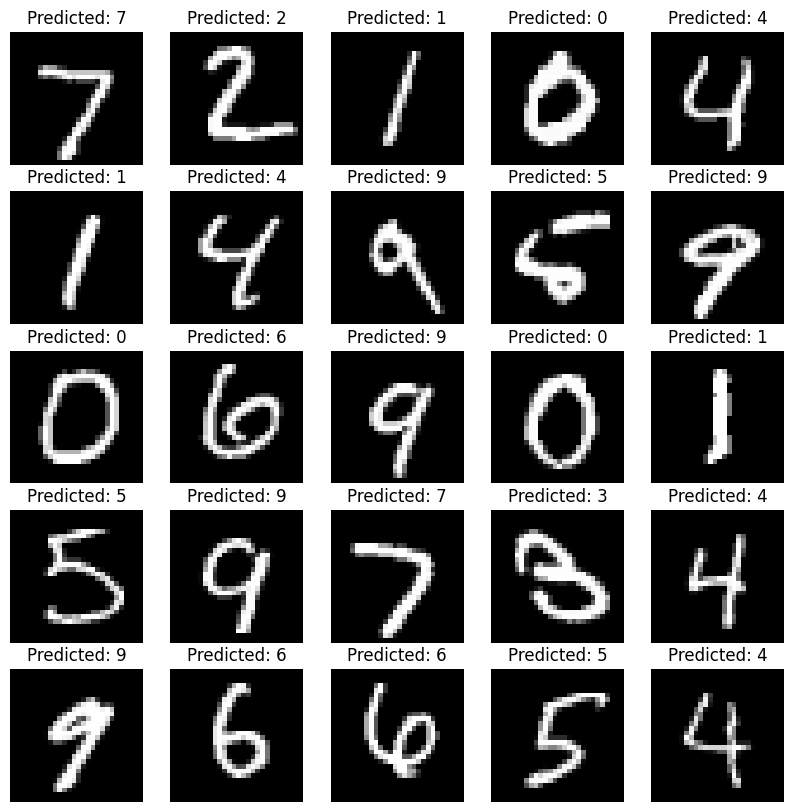

In [11]:
plt.figure(figsize = (10, 10))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap = 'gray')
    plt.title(f"Predicted: {tf.argmax(predictions[i])}")
    plt.axis('off')

plt.show()